In [1]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import imgaug as ia
from imgaug import augmenters as iaa
from PIL import Image
import numpy as np
import matplotlib.patches as patches

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!mkdir datasets

In [4]:
!mkdir bacteria_dataset

In [5]:
!mkdir bacteria_dataset/train

In [6]:
!mkdir bacteria_dataset/val

In [7]:
df=pd.read_csv("gdrive/MyDrive/annot_tab.csv")
df.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,sp01,1316,1600,145,115,sp01_img01.jpg,3001,2960
1,sp01,2601,1970,150,116,sp01_img01.jpg,3001,2960
2,sp01,2032,908,131,145,sp01_img01.jpg,3001,2960
3,sp01,1133,532,150,156,sp01_img01.jpg,3001,2960
4,sp01,1112,501,145,120,sp01_img02.jpg,2894,2890


In [8]:
!unzip gdrive/MyDrive/bacteria_images.zip -d bacteria_images/

Archive:  gdrive/MyDrive/bacteria_images.zip
  inflating: bacteria_images/bacteria_images/sp01_img01.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img02.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img03.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img04.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img05.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img06.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img07.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img08.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img09.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img10.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img11.jpg  
  inflating: bacteria_images/bacteria_images/sp01_img12.jpg  
  inflating: bacteria_images/bacteria_images/sp02_img01.jpg  
  inflating: bacteria_images/bacteria_images/sp02_img02.jpg  
  inflating: bacteria_images/bacteria_images/sp02_img03.jpg  
  inflating: bacteria_ima

In [9]:
len(df)

56865

In [10]:
output_dir = 'divided_images'
src_dir='bacteria_images/bacteria_images'
os.makedirs(output_dir, exist_ok=True)
adjusted_annotations = []
# Iterate through each image and divide into 25 parts
for image in os.listdir(src_dir):
    image_name = Image.open(os.path.join("bacteria_images/bacteria_images",image))
    width, height = image_name.size

    part_width = width // 5
    part_height = height // 5

    for part_num in range(25):
        left = (part_num % 5) * part_width
        upper = (part_num // 5) * part_height
        right = left + part_width
        lower = upper + part_height
        im_name=f'divided_image_{image[:-4]}_part_{part_num}.jpg'
        part_image = image_name.crop((left, upper, right, lower))

        filtered_data = df.loc[df['image_name'] == image, ['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']]
        for index, row in filtered_data.iterrows():
          bbox_x = row['bbox_x']
          bbox_y = row['bbox_y']
          bbox_width = row['bbox_width']
          bbox_height = row['bbox_height']
          if left <= bbox_x < right and upper <= bbox_y < lower:

              adjusted_annotations.append([im_name[:-4],bbox_x - left,bbox_y - upper,
                                           min(bbox_x + bbox_width, right) - left,
                                           min(bbox_y + bbox_height, lower) - upper,im_name,part_width,part_height])

        part_image.save(os.path.join(output_dir, im_name))
        print(f"Saved: {im_name}")

Streaming output truncated to the last 5000 lines.
Saved: divided_image_sp15_img09_part_0.jpg
Saved: divided_image_sp15_img09_part_1.jpg
Saved: divided_image_sp15_img09_part_2.jpg
Saved: divided_image_sp15_img09_part_3.jpg
Saved: divided_image_sp15_img09_part_4.jpg
Saved: divided_image_sp15_img09_part_5.jpg
Saved: divided_image_sp15_img09_part_6.jpg
Saved: divided_image_sp15_img09_part_7.jpg
Saved: divided_image_sp15_img09_part_8.jpg
Saved: divided_image_sp15_img09_part_9.jpg
Saved: divided_image_sp15_img09_part_10.jpg
Saved: divided_image_sp15_img09_part_11.jpg
Saved: divided_image_sp15_img09_part_12.jpg
Saved: divided_image_sp15_img09_part_13.jpg
Saved: divided_image_sp15_img09_part_14.jpg
Saved: divided_image_sp15_img09_part_15.jpg
Saved: divided_image_sp15_img09_part_16.jpg
Saved: divided_image_sp15_img09_part_17.jpg
Saved: divided_image_sp15_img09_part_18.jpg
Saved: divided_image_sp15_img09_part_19.jpg
Saved: divided_image_sp15_img09_part_20.jpg
Saved: divided_image_sp15_img09_par

In [11]:
print(len(os.listdir("divided_images")))

9225


In [12]:
print(len(adjusted_annotations))

56848


In [13]:
new_df=pd.DataFrame(adjusted_annotations,columns=df.columns)
new_df.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,divided_image_sp23_img05_part_0,539,555,585,575,divided_image_sp23_img05_part_0.jpg,585,575
1,divided_image_sp23_img05_part_1,467,243,585,336,divided_image_sp23_img05_part_1.jpg,585,575
2,divided_image_sp23_img05_part_1,517,119,585,216,divided_image_sp23_img05_part_1.jpg,585,575
3,divided_image_sp23_img05_part_2,559,516,585,575,divided_image_sp23_img05_part_2.jpg,585,575
4,divided_image_sp23_img05_part_2,502,559,585,575,divided_image_sp23_img05_part_2.jpg,585,575


In [14]:
os.path.getsize("/content/divided_images")/(1024)**2

0.5546875

In [15]:
for im in os.listdir("divided_images"):
    if im not in list(new_df["image_name"].unique()):
      os.remove(os.path.join("divided_images",im))

In [16]:
len(os.listdir("divided_images"))

6340

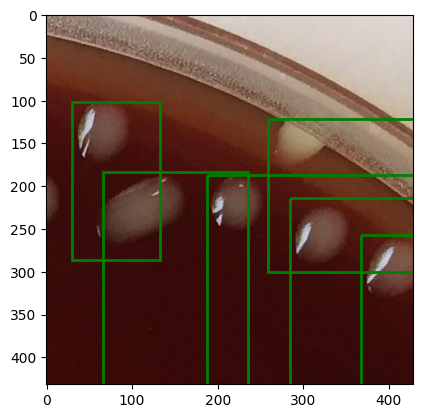

In [17]:
im=os.listdir("divided_images")
im_name=im[np.random.choice(len(im)-1)]
image = cv2.imread(os.path.join("divided_images",im_name))
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
filtered_data = new_df.loc[new_df['image_name'] == im_name, ['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']]
for index,label in filtered_data.iterrows():
    bbox_x = label['bbox_x']
    bbox_y = label['bbox_y']
    bbox_width = label['bbox_width']
    bbox_height = label['bbox_height']
    rect = patches.Rectangle(
        (bbox_x, bbox_y), bbox_width, bbox_height,
        linewidth=2, edgecolor='g', facecolor='none'
    )
    ax.add_patch(rect)

plt.show()

In [18]:
def generate_augmented_images(image):
    seq = iaa.Sequential([
        iaa.Multiply((0.5, 1.5)),  # Multiply image colors by a random value
        iaa.GaussianBlur(sigma=(0, 2.0)),  # Apply Gaussian blur with varying sigma
        iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # Add Gaussian noise
    ])

    augmented_images = seq(images=[image] * 3)
    return augmented_images

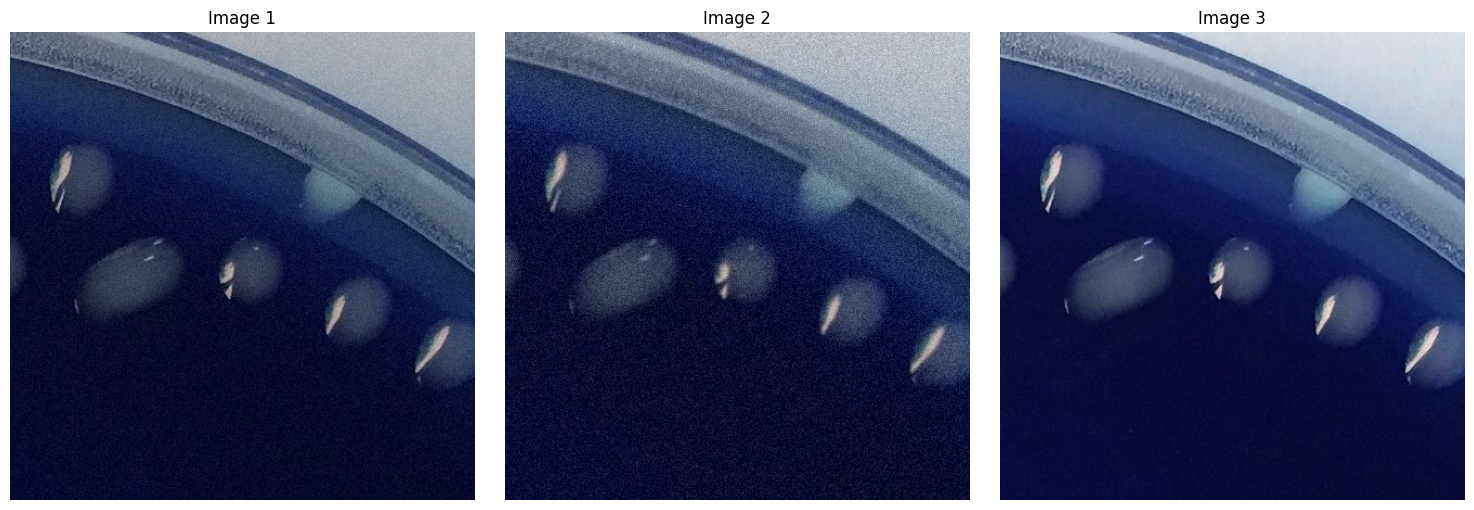

In [19]:
images=generate_augmented_images(image)
num_images = len(images)
fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    axs[i].imshow(images[i])
    axs[i].set_title(f'Image {i+1}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [20]:
!mkdir aug_images

In [21]:
df.columns

Index(['label_name', 'bbox_x', 'bbox_y', 'bbox_width', 'bbox_height',
       'image_name', 'image_width', 'image_height'],
      dtype='object')

In [22]:
augment_df = pd.DataFrame(columns=list(df.columns))

def process_images(directory_path, annotations_df):
    image_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)
        try:
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (500, 500))
            augmented_images = generate_augmented_images(resized_image)
            augmented_images.append(resized_image)
            for idx, aug_image in enumerate(augmented_images):
                width_ratio = aug_image.shape[1] / resized_image.shape[1]
                height_ratio = aug_image.shape[0] / resized_image.shape[0]
                new_image_path = os.path.join("aug_images", f"{os.path.splitext(image_file)[0]}_shaded_{idx}.jpg")
                annotations = annotations_df[annotations_df['image_name'] == image_file]
                adjusted_annotations = annotations.copy()
                adjusted_annotations['bbox_x'] *= width_ratio
                adjusted_annotations['bbox_y'] *= height_ratio
                adjusted_annotations['bbox_width'] *= width_ratio
                adjusted_annotations['bbox_height'] *= height_ratio
                adjusted_annotations['image_name']=new_image_path
                adjusted_annotations['label_name']=new_image_path[:-4]
                global augment_df
                augment_df = augment_df.append(adjusted_annotations, ignore_index=True)


                cv2.imwrite(new_image_path, aug_image)
                print(f"Saved shaded version {idx} of {image_file}")

            print(f"Processed {image_file}")
        except Exception as e:
            print(f"Error processing {image_file}: {e}")

In [23]:
process_images("/content/bacteria_images/bacteria_images",df)

<ipython-input-22-8308ab65cf95>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augment_df = augment_df.append(adjusted_annotations, ignore_index=True)


Saved shaded version 0 of sp23_img05.jpg
Saved shaded version 1 of sp23_img05.jpg
Saved shaded version 2 of sp23_img05.jpg
Saved shaded version 3 of sp23_img05.jpg
Processed sp23_img05.jpg
Saved shaded version 0 of sp19_img10.jpg
Saved shaded version 1 of sp19_img10.jpg
Saved shaded version 2 of sp19_img10.jpg
Saved shaded version 3 of sp19_img10.jpg
Processed sp19_img10.jpg
Saved shaded version 0 of sp21_img47.jpg
Saved shaded version 1 of sp21_img47.jpg
Saved shaded version 2 of sp21_img47.jpg
Saved shaded version 3 of sp21_img47.jpg
Processed sp21_img47.jpg
Saved shaded version 0 of sp22_img20.jpg
Saved shaded version 1 of sp22_img20.jpg
Saved shaded version 2 of sp22_img20.jpg
Saved shaded version 3 of sp22_img20.jpg
Processed sp22_img20.jpg
Saved shaded version 0 of sp05_img08.jpg
Saved shaded version 1 of sp05_img08.jpg
Saved shaded version 2 of sp05_img08.jpg
Saved shaded version 3 of sp05_img08.jpg
Processed sp05_img08.jpg
Saved shaded version 0 of sp08_img03.jpg
Saved shaded v

In [24]:
process_images("divided_images",new_df)

Saved shaded version 0 of divided_image_sp24_img07_part_14.jpg
Saved shaded version 1 of divided_image_sp24_img07_part_14.jpg
Saved shaded version 2 of divided_image_sp24_img07_part_14.jpg
Saved shaded version 3 of divided_image_sp24_img07_part_14.jpg
Processed divided_image_sp24_img07_part_14.jpg
Saved shaded version 0 of divided_image_sp13_img05_part_21.jpg
Saved shaded version 1 of divided_image_sp13_img05_part_21.jpg


<ipython-input-22-8308ab65cf95>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augment_df = augment_df.append(adjusted_annotations, ignore_index=True)


Streaming output truncated to the last 5000 lines.
Saved shaded version 2 of divided_image_sp22_img05_part_8.jpg
Saved shaded version 3 of divided_image_sp22_img05_part_8.jpg
Processed divided_image_sp22_img05_part_8.jpg
Saved shaded version 0 of divided_image_sp10_img13_part_15.jpg
Saved shaded version 1 of divided_image_sp10_img13_part_15.jpg
Saved shaded version 2 of divided_image_sp10_img13_part_15.jpg
Saved shaded version 3 of divided_image_sp10_img13_part_15.jpg
Processed divided_image_sp10_img13_part_15.jpg
Saved shaded version 0 of divided_image_sp24_img13_part_5.jpg
Saved shaded version 1 of divided_image_sp24_img13_part_5.jpg
Saved shaded version 2 of divided_image_sp24_img13_part_5.jpg
Saved shaded version 3 of divided_image_sp24_img13_part_5.jpg
Processed divided_image_sp24_img13_part_5.jpg
Saved shaded version 0 of divided_image_sp13_img04_part_21.jpg
Saved shaded version 1 of divided_image_sp13_img04_part_21.jpg
Saved shaded version 2 of divided_image_sp13_img04_part_21.j

In [25]:
augment_df['bbox_x'] /= augment_df['image_width']
augment_df['bbox_y'] /= augment_df['image_height']
augment_df['bbox_width'] /= augment_df['image_width']
augment_df['bbox_height'] /= augment_df['image_height']

In [26]:
augment_df['x_c']=(augment_df['bbox_x']+augment_df['bbox_width'])/2
augment_df['y_c']=(augment_df['bbox_y']+augment_df['bbox_height'])/2

In [27]:
augment_df.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height,x_c,y_c
0,aug_images/sp23_img05_shaded_0,0.904648,0.456061,0.020506,0.018062,aug_images/sp23_img05_shaded_0.jpg,2926,2879,0.462577,0.237061
1,aug_images/sp23_img05_shaded_0,0.89542,0.468218,0.02324,0.015978,aug_images/sp23_img05_shaded_0.jpg,2926,2879,0.45933,0.242098
2,aug_images/sp23_img05_shaded_0,0.903623,0.275096,0.039986,0.032303,aug_images/sp23_img05_shaded_0.jpg,2926,2879,0.471805,0.153699
3,aug_images/sp23_img05_shaded_0,0.167122,0.552275,0.056391,0.050365,aug_images/sp23_img05_shaded_0.jpg,2926,2879,0.111757,0.30132
4,aug_images/sp23_img05_shaded_0,0.189337,0.60264,0.047847,0.048628,aug_images/sp23_img05_shaded_0.jpg,2926,2879,0.118592,0.325634


In [28]:
len(os.listdir("aug_images"))

26836

In [29]:
!mkdir labels

In [30]:
labels_dict = {}
previous_image = None
current_label = ""

for image in augment_df["image_name"].unique():
    filtered_data = augment_df.loc[augment_df['image_name'] == image, ['x_c', 'y_c', 'bbox_width', 'bbox_height']]
    current_labels = []

    for index, row in filtered_data.iterrows():
        bbox_x = row['x_c']
        bbox_y = row['y_c']
        bbox_width = row['bbox_width']
        bbox_height = row['bbox_height']
        current_labels.append(f"0 {bbox_x} {bbox_y} {bbox_width} {bbox_height}")

    if image == previous_image:
        current_label += "\n".join(current_labels) + "\n"
    else:
        current_label = "\n".join(current_labels) + "\n"

    labels_dict[image] = current_label
    previous_image = image

In [31]:
for label, label_string in labels_dict.items():
    with open(f"labels/{label[10:-4]}.txt", "w") as f:
        f.writelines(label_string)

In [32]:
!mkdir bacteria_dataset/train/images
!mkdir bacteria_dataset/train/labels

In [33]:
!mkdir bacteria_dataset/val/images
!mkdir bacteria_dataset/val/labels

In [34]:
images=os.listdir("aug_images/")
image=os.path.join("aug_images/",images[np.random.choice(len(images)-1)])
labels=augment_df.loc[augment_df["image_name"]==image,["x_c","y_c","bbox_width","bbox_height","image_width","image_height"]]
labels=[(label["x_c"]*label["image_width"],label["y_c"]*label["image_height"],label["bbox_width"]*label["image_width"],label["bbox_height"]*label["image_height"]) for index, label in labels.iterrows()]

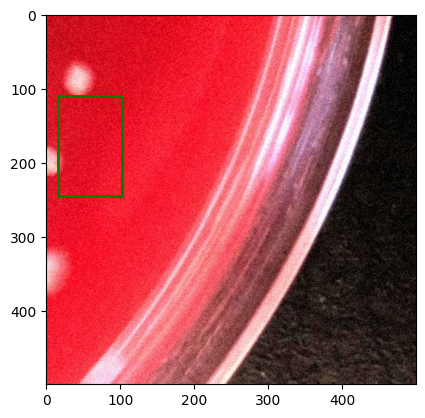

In [35]:
image = cv2.imread(image)
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

for label in labels:
    x_c, y_c, width, height = label
    x,y=2*x_c-width,2*y_c-width
    rect = patches.Rectangle(
        (x, y), width, height,
        linewidth=2, edgecolor='g', facecolor='none'
    )
    ax.add_patch(rect)

plt.show()

In [36]:
os.path.exists("labels/")

True

In [37]:
import random
import shutil
train_im_dir="bacteria_dataset/train/images"
train_targ_dir="bacteria_dataset/train/labels"
val_im_dir="bacteria_dataset/val/images"
val_targ_dir="bacteria_dataset/val/labels"

data_dir="aug_images/"
train_size=0.85
random.seed(540)
image_files = [f for f in os.listdir(data_dir) if f.endswith('.jpg')]
random.shuffle(image_files)
num_train = int(len(image_files) * train_size)
train_files = image_files[:num_train]
val_files = image_files[num_train:]
# Move files to train directory
for file in train_files:
    src_im_path = os.path.join(data_dir, file)
    src_lab_path=os.path.join("labels/",file[:-4]+".txt")
    shutil.copy(src_im_path, train_im_dir)
    shutil.copy(src_lab_path,train_targ_dir)
# Move files to test directory
for file in val_files:
    src_im_path = os.path.join(data_dir, file)
    src_lab_path=os.path.join("labels/",file[:-4]+".txt")
    shutil.copy(src_im_path, val_im_dir)
    shutil.copy(src_lab_path,val_targ_dir)

In [38]:
folder_path="bacteria_dataset/"
with open(f"{folder_path}/classes.names", "w") as f:
    f.write("bacteria")

In [39]:
%%writefile bacteria_v8.yaml
path: 'bacteria_dataset/'
train: 'train/images'
val: 'val/images'

# class names
names:
  0: 'bacteria'

Writing bacteria_v8.yaml


In [3]:
!cp -r bacteria_dataset datasets/

^C


In [4]:
!cp -r bacteria_dataset gdrive/MyDrive/